In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('sample.jpg', 0) # Load ảnh mức xám

In [4]:
print(img.shape)
# Show hình ảnh gốc
cv2.imshow("Image1", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(405, 720)


In [5]:
from PIL import Image
import numpy as np

In [6]:
rgb_img = Image.open('sample.jpg')
np_img = np.array(rgb_img)

In [7]:
def rgb2gray(rgb_img):
    gray = 0.31* rgb_img[:,:,0] + 0.58* rgb_img[:,:,1] + 0.11*rgb_img[:,:,2]
    return gray

In [8]:
gray = rgb2gray(np_img)

In [9]:
m, n = gray.shape

In [10]:
u, s, vt = np.linalg.svd(gray)

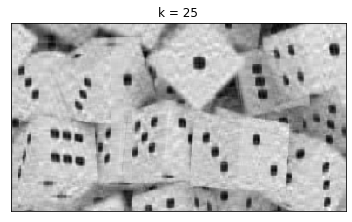

25


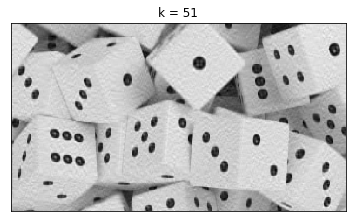

51


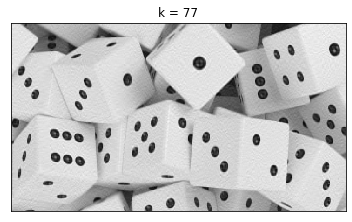

77


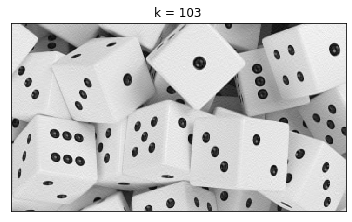

103


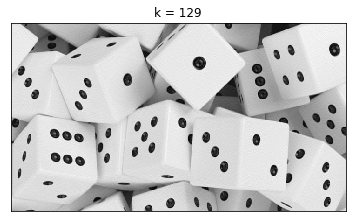

129


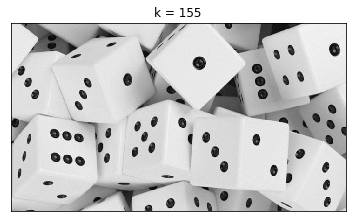

155


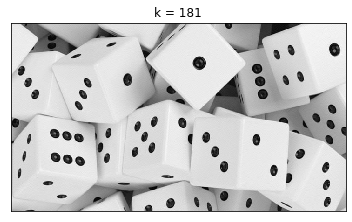

181


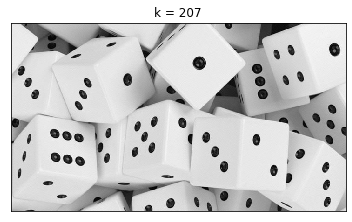

207


In [13]:
for r in np.arange(0.1, 0.9, 0.1):
    k = int(r*n*m/(n+m+1))
    # Tính u' dựa trên k
    U = u[:,:k] 
    # Tính s' dựa trên k
    S = s[:k]
    # Tính v' dựa trên k
    VT = vt[:k,:]
    # Đến đây là nén xong rồi đó, 
    # Ta chỉ việc lưu u', s', v' xuống file là OK: comp_<k>_<r>.npy
    # Ví dụ: comp_43_0.1.npy
    np.savez("com_"+str(k)+"_"+str(r)+".npz", U=U, S=S, VT=VT)
    # Khôi phục ảnh: res_img = u' x s' x v'
    res_img= np.matrix(U) * np.diag(S) * np.matrix(VT)
    # Show ảnh gốc và res_img --> tương ứng với k hiện tại
    plt.imshow(res_img, cmap='gray')
    title = "k = %s" % k
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()
    print(k)
    # Lưu ảnh res_img xuống file để làm báo cáo
    cv2.imwrite("res_img_"+str(k)+"_"+str(r)+".jpg", res_img)
    
    